<a href="https://colab.research.google.com/github/AbinayaPS/Machine-Learning/blob/master/Titanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
import numpy as np

In [66]:
from google.colab import files 
uploaded = files.upload()

Saving gender_submission.csv to gender_submission.csv


In [43]:
df = pd.read_csv('train.csv')
print(df.head())
print(df.info()) 
print(df.describe())

   PassengerId  Survived  Pclass  ...     Fare Cabin  Embarked
0            1         0       3  ...   7.2500   NaN         S
1            2         1       1  ...  71.2833   C85         C
2            3         1       3  ...   7.9250   NaN         S
3            4         1       1  ...  53.1000  C123         S
4            5         0       3  ...   8.0500   NaN         S

[5 rows x 12 columns]
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB
None
       Pa

In [44]:
df.isnull().any()

PassengerId    False
Survived       False
Pclass         False
Name           False
Sex            False
Age             True
SibSp          False
Parch          False
Ticket         False
Fare           False
Cabin           True
Embarked        True
dtype: bool

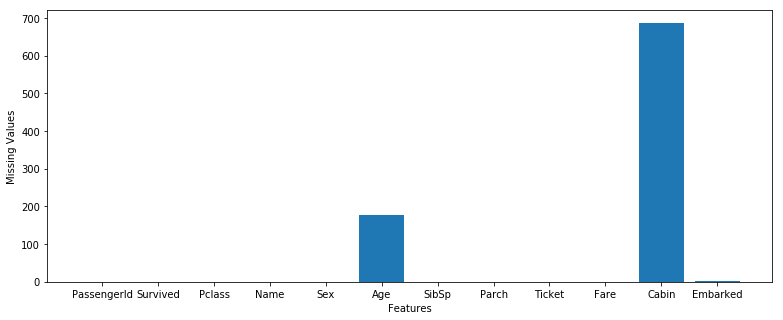

In [45]:
cols = np.arange(len(df.columns))
plt.rcParams['figure.figsize']=(13,5)
plt.bar(cols,df.isnull().sum(),align='center') 
plt.xticks(cols,list(df.columns))
plt.xlabel("Features") 
plt.ylabel("Missing Values") 
plt.show()

In [46]:
df = df.drop(['Cabin'],axis=1)
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [47]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Embarked         2
dtype: int64

In [48]:
df.Embarked.fillna('Q',inplace=True)
df.Age.fillna(np.mean(df.Age),inplace=True)
df.isnull().any()

PassengerId    False
Survived       False
Pclass         False
Name           False
Sex            False
Age            False
SibSp          False
Parch          False
Ticket         False
Fare           False
Embarked       False
dtype: bool

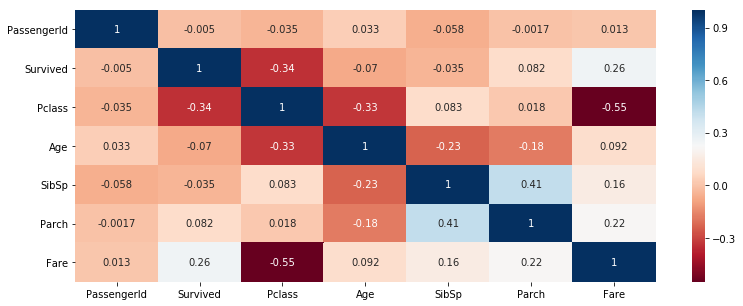

In [49]:
cor = df.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.RdBu)
plt.show()

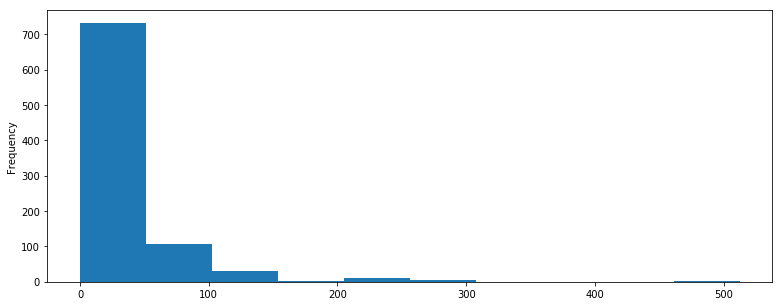

In [50]:
df['Fare'].plot.hist() 


In [0]:
df.Sex.replace(['male','female'],[0,1],inplace = True)

In [0]:
df.Embarked.replace(['S','C','Q'],[0,1,2],inplace=True)

In [53]:
from sklearn.linear_model import LogisticRegression 
from sklearn.model_selection import train_test_split
log = LogisticRegression()
y = df['Survived'].values
X=df.drop(['Survived','Name','Ticket'],1).values
Xtrain,Xtest,ytrain,ytest = train_test_split(X,y,test_size=0.3,random_state=99)
log.fit(Xtrain,ytrain)
pred = log.predict(Xtest)


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [54]:
print(log.score(Xtest,ytest))

0.7686567164179104


In [55]:
from sklearn.metrics import classification_report
print(classification_report(ytest,pred))

              precision    recall  f1-score   support

           0       0.81      0.83      0.82       174
           1       0.68      0.65      0.66        94

    accuracy                           0.77       268
   macro avg       0.75      0.74      0.74       268
weighted avg       0.77      0.77      0.77       268



In [56]:
from sklearn.metrics import confusion_matrix 
print(confusion_matrix(ytest,pred))

[[145  29]
 [ 33  61]]


In [57]:
test = pd.read_csv('test.csv') 
print(test.info()) 
print(test.describe()) 
print(test.tail())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           417 non-null float64
Cabin          91 non-null object
Embarked       418 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB
None
       PassengerId      Pclass         Age       SibSp       Parch        Fare
count   418.000000  418.000000  332.000000  418.000000  418.000000  417.000000
mean   1100.500000    2.265550   30.272590    0.447368    0.392344   35.627188
std     120.810458    0.841838   14.181209    0.896760    0.981429   55.907576
min     892.000000    1.000000    0.170000    0.000000    0.000000    0.000000
25%     996.250000    1.000000   21.000000    0.00

In [58]:
test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [59]:
test = test.drop('Cabin',axis=1)
print(test.head())

   PassengerId  Pclass  ...     Fare Embarked
0          892       3  ...   7.8292        Q
1          893       3  ...   7.0000        S
2          894       2  ...   9.6875        Q
3          895       3  ...   8.6625        S
4          896       3  ...  12.2875        S

[5 rows x 10 columns]


In [60]:
test.Age.fillna(np.mean(test.Age),inplace=True) 
test.Fare.fillna(np.mean(test.Fare),inplace=True)
test.isnull().any()

PassengerId    False
Pclass         False
Name           False
Sex            False
Age            False
SibSp          False
Parch          False
Ticket         False
Fare           False
Embarked       False
dtype: bool

In [0]:
test.Embarked.replace(['S','C','Q'],[0,1,2],inplace=True)
test.Sex.replace(['male','female'],[0,1],inplace=True)

In [0]:
test_X = test.drop(['Name','Ticket'],1) 
actual_pred = log.predict(test_X)

In [68]:
actual = pd.read_csv('gender_submission.csv') 
actual.head() 
actual.isnull().any()

PassengerId    False
Survived       False
dtype: bool

In [70]:
actual_val = actual.drop(['PassengerId'],1) 
print(log.score(test_X,actual_val))

0.9473684210526315


In [72]:
print(classification_report(actual_val,actual_pred))

              precision    recall  f1-score   support

           0       0.98      0.94      0.96       266
           1       0.90      0.97      0.93       152

    accuracy                           0.95       418
   macro avg       0.94      0.95      0.94       418
weighted avg       0.95      0.95      0.95       418



In [73]:
print(confusion_matrix(actual_val,actual_pred))

[[249  17]
 [  5 147]]
